In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('BMI_Index.csv')


# Converting the Gender as numerical assignment.

In [3]:
# creating a dict file  
gender = {'Male': 1,'Female': 2} 
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
dataset.Gender = [gender[item] for item in dataset.Gender] 
#print(dataset) 

In [16]:
X = dataset.iloc[:, [0,3]].values # I have excluded the dependent variable Obesity Index


# Using the Elbow Method to find the optimal number of clusters

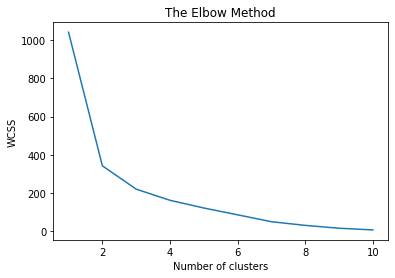

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

According to the graph above the Elbow method curve has started to bend from the point 3, hence the optimum number of centroid and clusters will be 3.

# Training K-means model on the dataset.


In [29]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)#Predicting the cluster type

In [30]:
print(y_kmeans)

[0 1 0 0 0 0 2 2 0 0 1 0 0 1 1 2 2 2 2 2 2 2 0 2 1 0 0 1 2 2 2 1 1 2 2 0 0
 0 2 1 0 2 1 2 0 1 0 0 0 2 2 1 2 0 0 0 0 2 0 2 1 2 1 1 2 2 0 1 0 0 1 0 2 1
 0 0 0 0 0 1 0 2 0 0 2 1 2 2 2 2 2 0 0 1 0 2 0 2 1 1 0 2 2 0 0 0 2 2 0 0 0
 2 0 1 0 0 1 2 2 2 0 0 0 2 2 0 0 0 2 1 2 1 2 0 2 2 2 0 2 2 1 0 2 2 2 0 0 2
 0 0 1 0 0 2 2 0 0 2 0 0 1 1 0 2 0 1 0 2 0 1 0 2 2 0 0 0 0 0 2 0 0 0 0 1 0
 0 2 0 2 0 2 2 0 2 2 2 0 0 2 2 1 0 0 0 2 0 2 0 0 0 0 2 2 2 1 2 2 2 2 2 1 2
 0 2 1 2 0 0 2 2 0 1 0 0 0 0 2 2 1 2 0 1 1 2 1 2 0 2 0 0 0 2 2 2 2 1 0 2 2
 0 2 2 2 1 0 2 2 2 2 1 2 2 0 1 0 0 0 1 0 1 1 2 2 0 0 0 0 2 1 2 0 0 0 0 2 2
 1 0 0 0 2 0 1 0 2 0 2 2 1 2 2 2 2 1 1 2 0 2 0 2 0 0 2 2 0 1 1 0 0 0 2 0 1
 1 1 1 2 2 0 2 0 0 0 0 0 0 1 1 2 1 1 1 1 2 1 0 0 2 1 0 1 0 2 0 2 2 0 0 2 0
 0 2 1 1 0 2 2 2 2 0 2 1 0 2 2 1 2 0 0 1 1 1 1 0 2 0 0 2 0 2 0 0 1 0 0 2 1
 2 2 2 1 0 2 2 2 0 2 1 2 1 1 2 2 0 1 1 0 0 0 0 1 2 2 0 1 2 2 2 1 2 0 1 2 2
 0 2 0 0 2 2 2 0 2 1 1 1 0 1 0 2 0 2 1 2 1 2 0 2 2 0 2 2 1 2 0 0 2 1 1 2 2
 0 2 0 0 0 2 1 0 2 1 2 1 

In the above output according to the python indexing person of id 1 belongs to the cluster 3. Which means clusters have been created like 0,1,2.

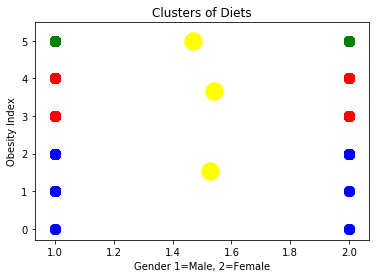

In [34]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Diets')
plt.xlabel('Gender 1=Male, 2=Female')
plt.ylabel('Obesity Index')
#plt.legend()
plt.show()